# Hypothesis

When people think of a hypothesis, they usually envision something like "Variable X has a positive effect on the target variable". I want to do something different. The hypothesis that I want to check, more out of curiousity than anything else, is what exactly matters when you apply for a loan, and my stated hypothesis is going to be that loan history is the biggest predictor of whether the loan is actually going to be approved or not. While I know that I have to stretch it a bit here, as we are not predicting approvals but repayment issues instead, and my response to it would be that banks learn from their data which customers to reject, and our data is pretty old, so it might have been used for this 'learning opportunity', so my claim here would be that, no matter how impressive your status and wealth are, you still would be blacklisted by biggest financial institutions on the planet if you had defaulted on your real estate development loans six times

# Methodology

Now that we have our hypothesis, it is time to tell the reader what exactly we are going to be doing here. Given the sheer number of features that we have, it becomes simply impractical to do data exploration here, especially considering the sheer number of engineered features that are definitely not going to be interpretable. For that reason, what we are going to do is take the features that somehow managed to get thorough this brutal selection mechanism in their purest form and explore only them, potentially discovering something fun and interesting in the future. After this is done, we will head straight to the methodology

In [29]:
application_train.to_parquet('APPLICATION_TRAIN_METHOD.parquet')
application_test.to_parquet('APPLICATION_TEST_METHOD.parquet')

In [37]:
application_train = pd.read_parquet('APPLICATION_TRAIN_METHOD.parquet')
application_test = pd.read_parquet('APPLICATION_TEST_METHOD.parquet')

# Data Exploration (continued)

In [38]:
untouched = [
    'TARGET',
    'CURR_APP_ACCOMMODATION_CLUSTER',
    'CURR_APP_AMT_ANNUITY',
    'CURR_APP_AMT_CREDIT',
    'CURR_APP_DAYS_ID_PUBLISH',
    'CURR_APP_DAYS_REGISTRATION',
    'CURR_APP_EXT_SOURCE_1',
    'CURR_APP_EXT_SOURCE_2',
    'CURR_APP_EXT_SOURCE_3',
    'CURR_APP_ID_CHANGE_YEARS',
    'CURR_APP_REGION_POPULATION_RELATIVE',
    'CURR_APP_REGION_RATING_CLIENT',
    'CURR_APP_REGION_RATING_CLIENT_W_CITY',
    'CURR_APP_YEARS_EMPLOYED',
]

In [25]:
untouched = application_train[untouched].copy()

## Target

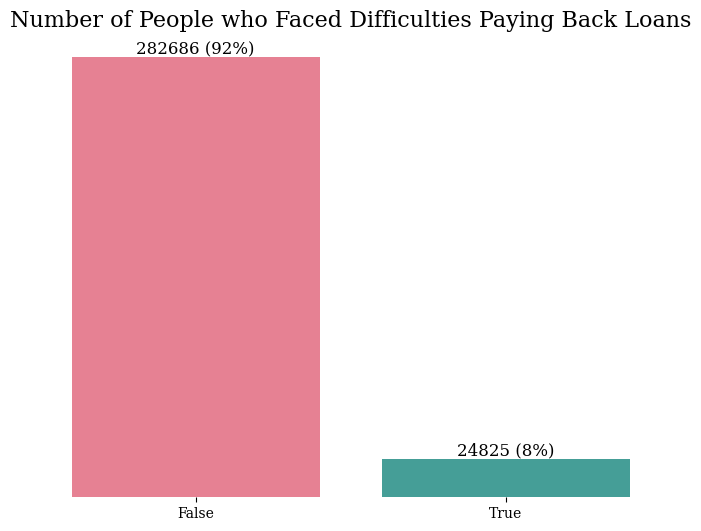

In [39]:
sf.draw_count(application_train, 'husl', 'Number of People who Faced Difficulties Paying Back Loans', 'TARGET', 5000)

To refresh the reader's memory of what our dustribution is

## Accommodation Cluster

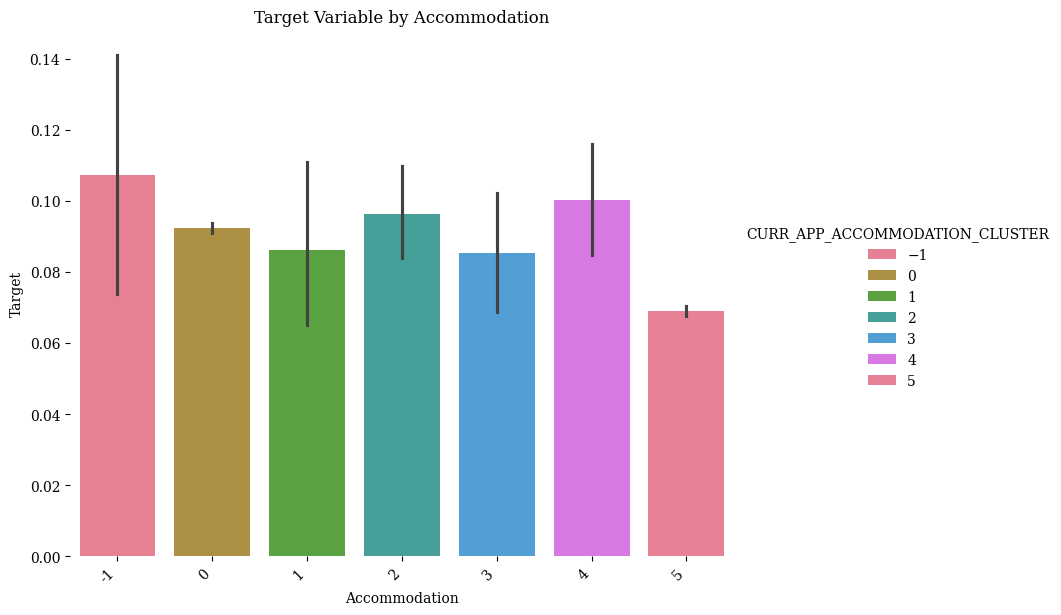

In [40]:
sf.draw_catplot('CURR_APP_ACCOMMODATION_CLUSTER', 'Accommodation', 'TARGET', 'Target', 'Target Variable by Accommodation', 'bar', application_train, hue = 'CURR_APP_ACCOMMODATION_CLUSTER', palette = 'husl', legend = True)

This is the confirmation that I did a really good job with clustering and the confidence intervals confirm it

## Annuity

Text(0.5, 0, 'Annuity (log scale)')

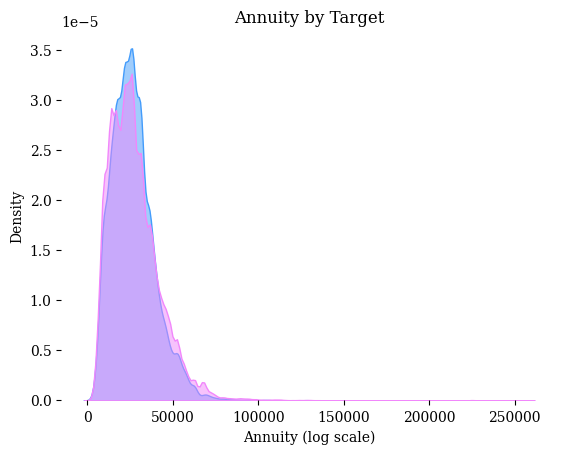

In [41]:
sns.kdeplot(application_train["CURR_APP_AMT_ANNUITY"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_AMT_ANNUITY"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("Annuity by Target", fontsize=12)
plt.xlabel("Annuity (log scale)", fontsize=10)

This is a strong sign that we should log the variable

Text(0.5, 0, 'Annuity (log scale)')

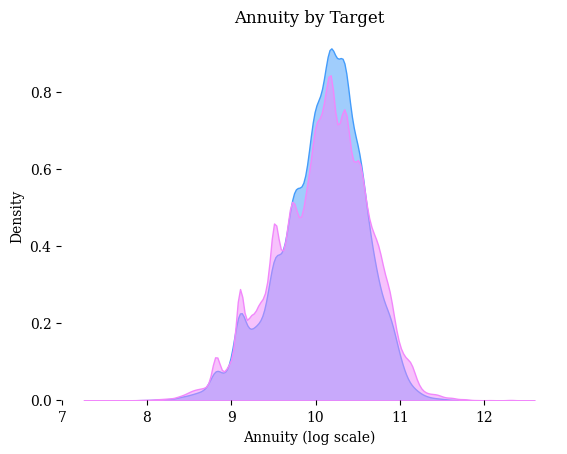

In [34]:
application_train['CURR_APP_AMT_ANNUITY_log'] = np.log1p(application_train['CURR_APP_AMT_ANNUITY'])

sns.kdeplot(application_train["CURR_APP_AMT_ANNUITY_log"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_AMT_ANNUITY_log"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("Annuity by Target", fontsize=12)
plt.xlabel("Annuity (log scale)", fontsize=10)

Overall, it seems like this graph demonstrates the differences in a clearer manner. One notable thing here is the 'spikes' on the pink graph. While important, it is something that boosting models can pick up. We will replace the original feature with its logged variant

In [35]:
application_train.drop(columns=['CURR_APP_AMT_ANNUITY'], inplace=True)
application_test['CURR_APP_AMT_ANNUITY_log'] = np.log1p(application_test['CURR_APP_AMT_ANNUITY'])
application_test.drop(columns=['CURR_APP_AMT_ANNUITY'], inplace=True)

## Credit

Text(0.5, 0, 'Credit Amount')

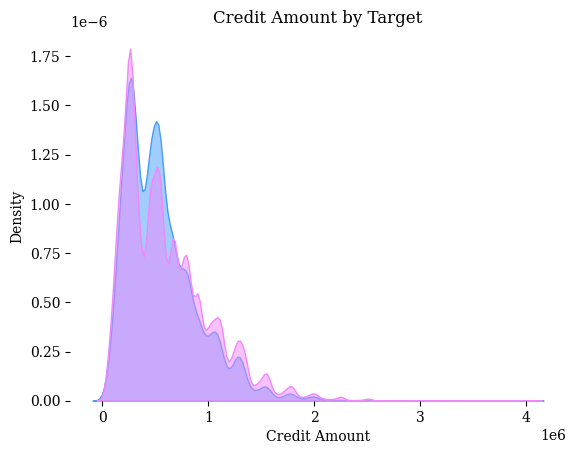

In [43]:
sns.kdeplot(application_train["CURR_APP_AMT_CREDIT"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_AMT_CREDIT"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("Credit Amount by Target", fontsize=12)
plt.xlabel("Credit Amount", fontsize=10)

The graph looks interesting and we have the spikes again. Lets look at the logged variation for the full picture

Text(0.5, 0, 'Credit Amount (log scale)')

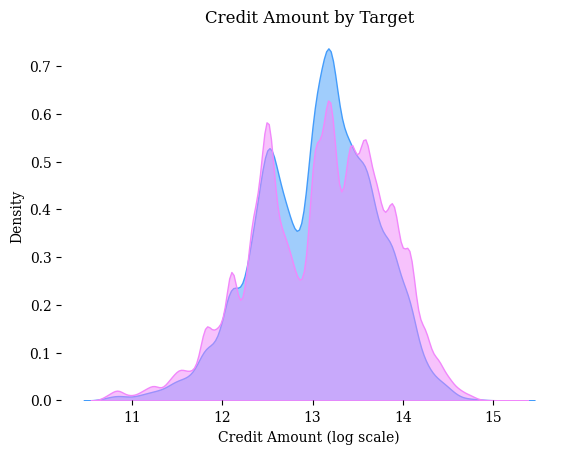

In [44]:
application_train['CURR_APP_AMT_CREDIT_log'] = np.log1p(application_train['CURR_APP_AMT_CREDIT'])

sns.kdeplot(application_train["CURR_APP_AMT_CREDIT_log"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_AMT_CREDIT_log"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("Credit Amount by Target", fontsize=12)
plt.xlabel("Credit Amount (log scale)", fontsize=10)

This graph looks more interpretable and the 'spikes' are preserved, we are going to keep this one

In [45]:
application_train.drop(columns=['CURR_APP_AMT_CREDIT'], inplace=True)
application_test['CURR_APP_AMT_CREDIT_log'] = np.log1p(application_test['CURR_APP_AMT_CREDIT'])
application_test.drop(columns=['CURR_APP_AMT_CREDIT'], inplace=True)

## Days ID Publish

Text(0.5, 0, 'Days Since Publication')

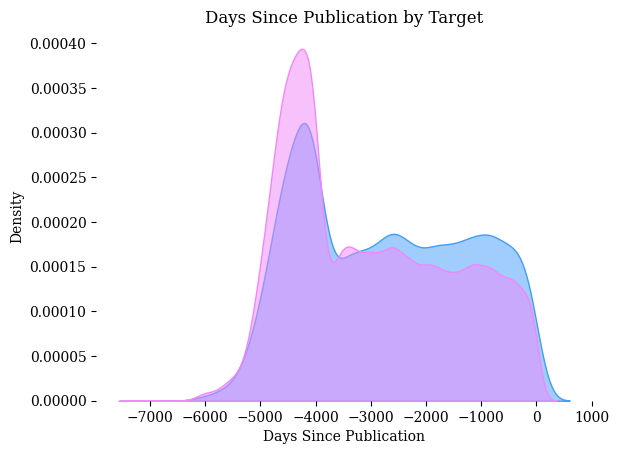

In [46]:
sns.kdeplot(application_train["CURR_APP_DAYS_ID_PUBLISH"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_DAYS_ID_PUBLISH"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("Days Since Publication by Target", fontsize=12)
plt.xlabel("Days Since Publication", fontsize=10)

The differences are really noticeable. Now lets convert it in its absolute value and look at logs

Text(0.5, 0, 'Days Since Publication (log scale)')

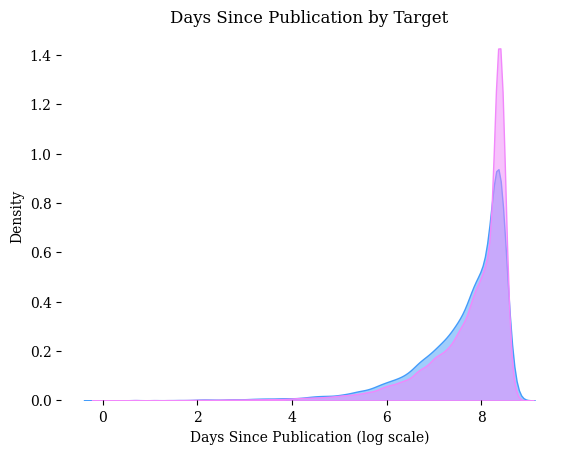

In [48]:
application_train['CURR_APP_DAYS_ID_PUBLISH_log'] = np.log1p(np.abs(application_train['CURR_APP_DAYS_ID_PUBLISH']))

sns.kdeplot(application_train["CURR_APP_DAYS_ID_PUBLISH_log"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_DAYS_ID_PUBLISH_log"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("Days Since Publication by Target", fontsize=12)
plt.xlabel("Days Since Publication (log scale)", fontsize=10)

I feel like the differences had been more pronounced without logs, so that is how we are going to keep it

In [49]:
application_train.drop(columns=['CURR_APP_DAYS_ID_PUBLISH_log'], inplace=True)

## Days Registration

Text(0.5, 0, 'Days Since Publication')

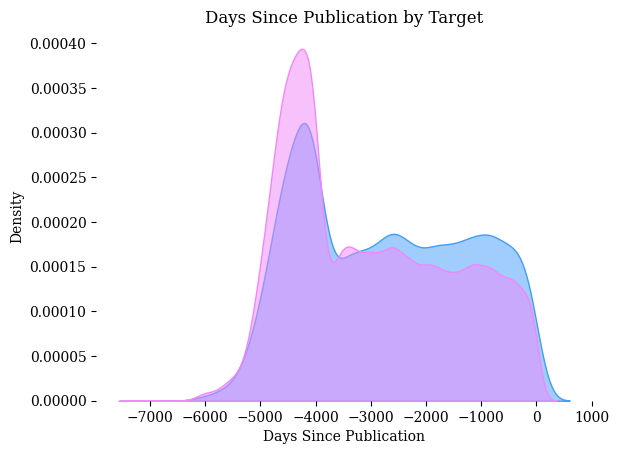

In [50]:
sns.kdeplot(application_train["CURR_APP_DAYS_ID_PUBLISH"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_DAYS_ID_PUBLISH"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("Days Since Publication by Target", fontsize=12)
plt.xlabel("Days Since Publication", fontsize=10)

The story is exactly the same as with the previous feature, we will leave it alone

## EXT_SOURCE_1

Text(0.5, 0, 'External Source 1')

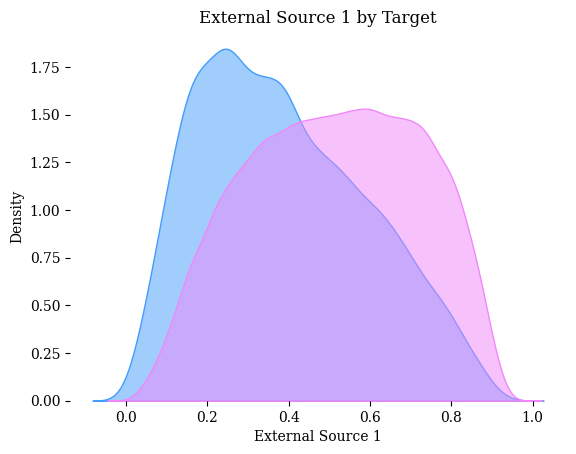

In [51]:
sns.kdeplot(application_train["CURR_APP_EXT_SOURCE_1"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_EXT_SOURCE_1"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("External Source 1 by Target", fontsize=12)
plt.xlabel("External Source 1", fontsize=10)

The differences are noticeable. I am a bit skeptical whether it is going to be any good but let's look at logs

Text(0.5, 0, 'External Source 1 (log scale)')

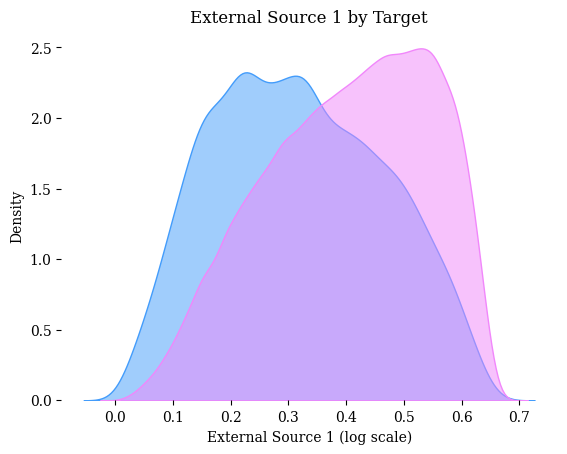

In [52]:
application_train['CURR_APP_EXT_SOURCE_1_log'] = np.log1p(np.abs(application_train['CURR_APP_EXT_SOURCE_1']))

sns.kdeplot(application_train["CURR_APP_EXT_SOURCE_1_log"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_EXT_SOURCE_1_log"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("External Source 1 by Target", fontsize=12)
plt.xlabel("External Source 1 (log scale)", fontsize=10)

As suspected, at values as low as this, as the feature is between 0 and 1, log only makes things less clear. We are going to take the feature in its original form

In [53]:
application_train.drop(columns=['CURR_APP_EXT_SOURCE_1_log'], inplace=True)

## EXT_SOURCE_2

Text(0.5, 0, 'External Source 2')

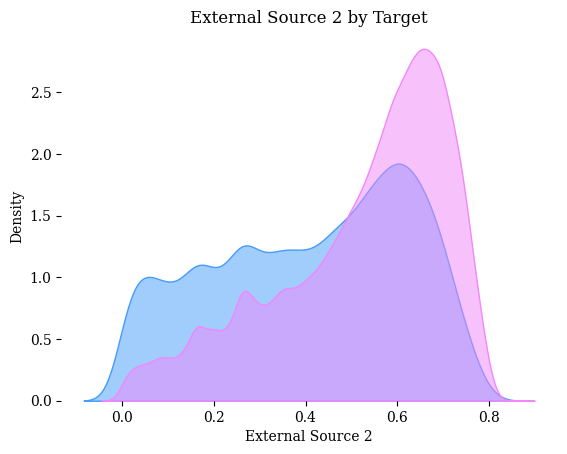

In [54]:
sns.kdeplot(application_train["CURR_APP_EXT_SOURCE_2"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_EXT_SOURCE_2"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("External Source 2 by Target", fontsize=12)
plt.xlabel("External Source 2", fontsize=10)

Same, leave as is

## EXT_SOURCE_3

Text(0.5, 0, 'External Source 3')

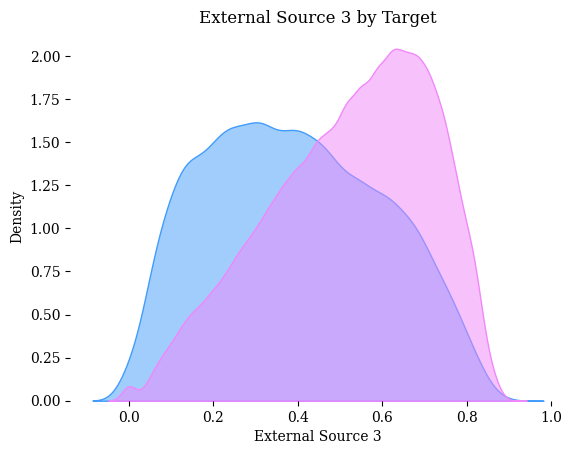

In [55]:
sns.kdeplot(application_train["CURR_APP_EXT_SOURCE_3"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_EXT_SOURCE_3"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("External Source 3 by Target", fontsize=12)
plt.xlabel("External Source 3", fontsize=10)

Same, leave as is

## ID Change Years

Text(0.5, 0, 'ID Change Years')

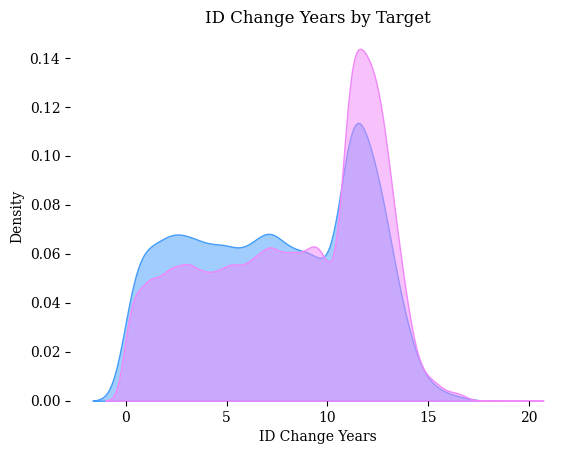

In [56]:
sns.kdeplot(application_train["CURR_APP_ID_CHANGE_YEARS"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_ID_CHANGE_YEARS"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("ID Change Years by Target", fontsize=12)
plt.xlabel("ID Change Years", fontsize=10)

Logging would certainly make things worse at values as low as this so better to keep it the way it is

## Region Population Relative

Text(0.5, 0, 'Region Population Relative')

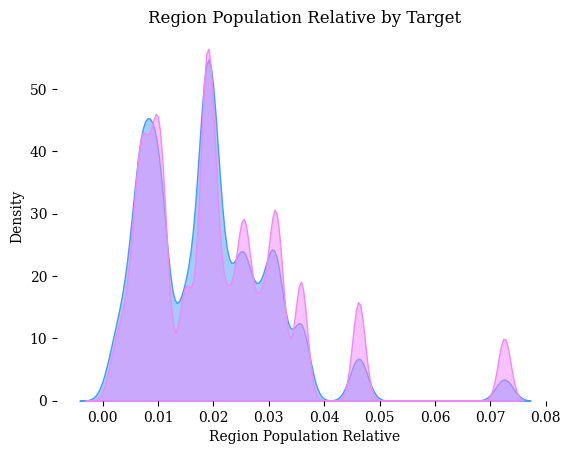

In [58]:
sns.kdeplot(application_train["CURR_APP_REGION_POPULATION_RELATIVE"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_REGION_POPULATION_RELATIVE"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("Region Population Relative by Target", fontsize=12)
plt.xlabel("Region Population Relative", fontsize=10)

Let's actually try logging it, as it may just improve the visibility here

Text(0.5, 0, 'Region Population Relative (log scale)')

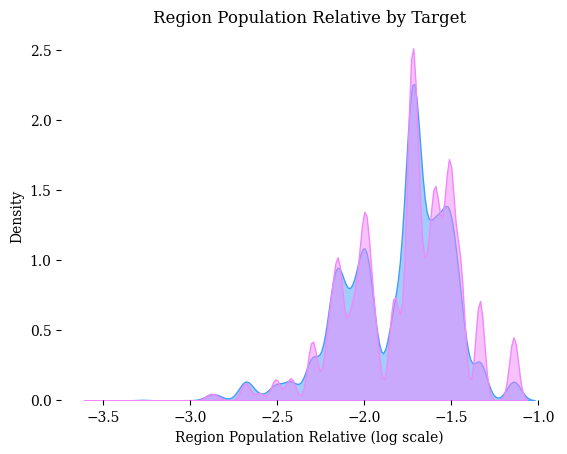

In [63]:
application_train['CURR_APP_REGION_POPULATION_RELATIVE_log'] = np.log10(application_train['CURR_APP_REGION_POPULATION_RELATIVE'])

sns.kdeplot(application_train["CURR_APP_REGION_POPULATION_RELATIVE_log"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_REGION_POPULATION_RELATIVE_log"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("Region Population Relative by Target", fontsize=12)
plt.xlabel("Region Population Relative (log scale)", fontsize=10)

I feel like the original one is more readable

In [64]:
application_train.drop(columns=['CURR_APP_REGION_POPULATION_RELATIVE_log'], inplace=True)

## Region Rating Client

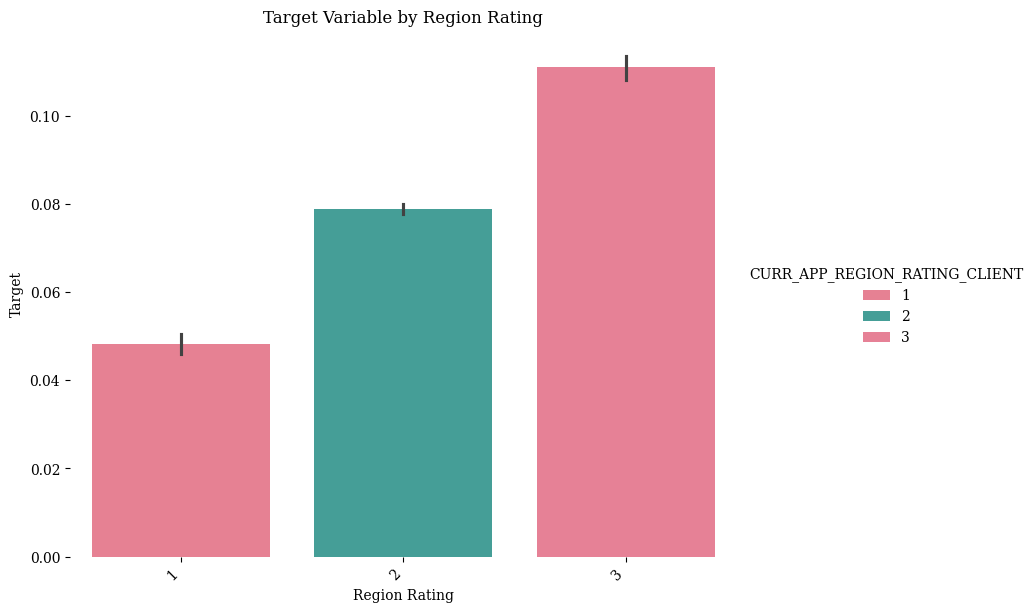

In [66]:
sf.draw_catplot('CURR_APP_REGION_RATING_CLIENT', 'Region Rating', 'TARGET', 'Target', 'Target Variable by Region Rating', 'bar', application_train, hue = 'CURR_APP_REGION_RATING_CLIENT', palette = 'husl', legend = True)

The differences here are very clear

## Region Rating Client City

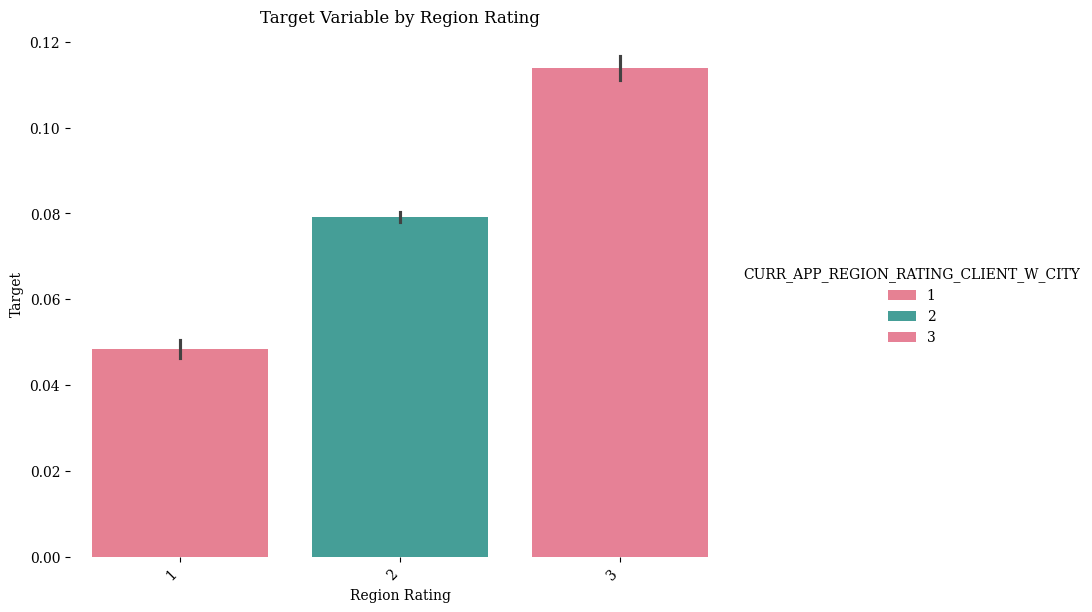

In [67]:
sf.draw_catplot('CURR_APP_REGION_RATING_CLIENT_W_CITY', 'Region Rating', 'TARGET', 'Target', 'Target Variable by Region Rating', 'bar', application_train, hue = 'CURR_APP_REGION_RATING_CLIENT_W_CITY', palette = 'husl', legend = True)

Pretty much the same as the previous one. Notably, looking back, those two were not highly correlated with each other

## Years Employed

Text(0.5, 0, 'Years Employed')

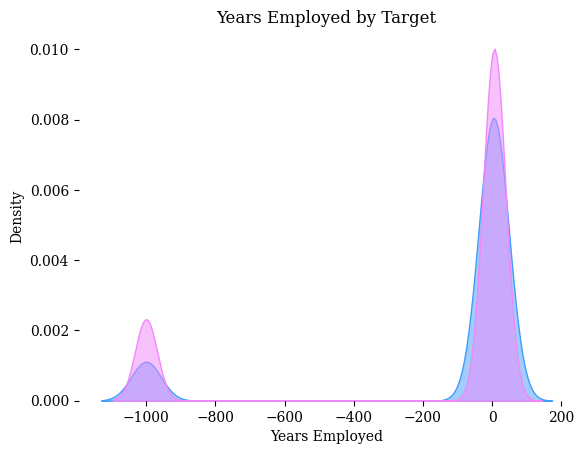

In [68]:
sns.kdeplot(application_train["CURR_APP_YEARS_EMPLOYED"][application_train['TARGET'] == 1], color="#439cfb", fill=True, alpha=0.5)
sns.kdeplot(application_train["CURR_APP_YEARS_EMPLOYED"][application_train['TARGET'] == 0], color="#f187fb", fill=True, alpha=0.5)
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
plt.title("Years Employed by Target", fontsize=12)
plt.xlabel("Years Employed", fontsize=10)

That certainly is an interesting graph. Lets look at both cases. I will use -500 years of employment to separate the two

In [73]:
less_than_500 = application_train[application_train["CURR_APP_YEARS_EMPLOYED"] < -500]
more_than_500 = application_train[application_train["CURR_APP_YEARS_EMPLOYED"] >= -500]

/tmp/ipykernel_52989/127236729.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_52989/127236729.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_52989/127236729.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


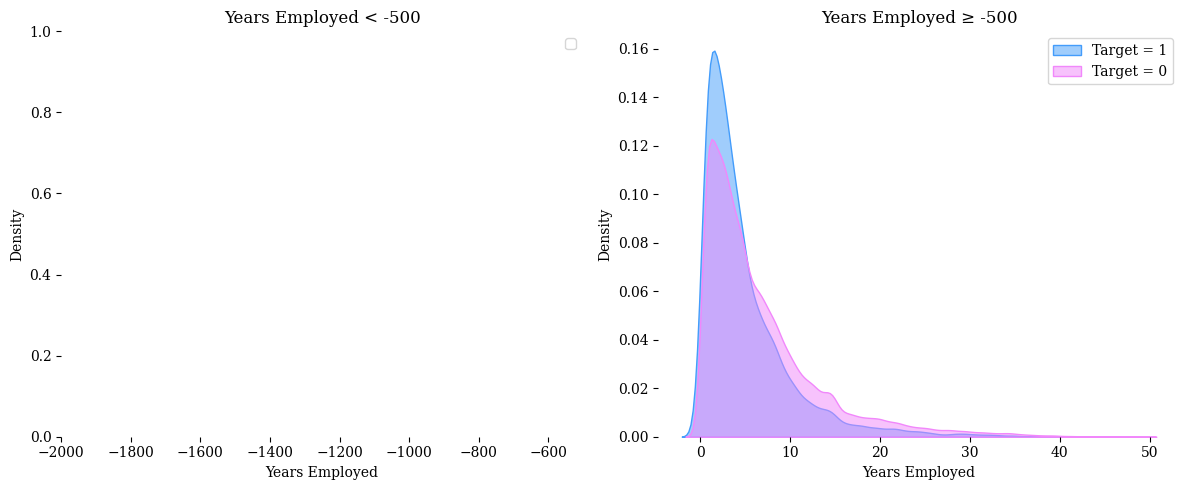

In [76]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(
    less_than_500["CURR_APP_YEARS_EMPLOYED"][less_than_500['TARGET'] == 1],
    color="#439cfb", fill=True, alpha=0.5, label='Target = 1'
)
sns.kdeplot(
    less_than_500["CURR_APP_YEARS_EMPLOYED"][less_than_500['TARGET'] == 0],
    color="#f187fb", fill=True, alpha=0.5, label='Target = 0'
)
plt.title("Years Employed < -500")
plt.legend()
plt.xlim(-2000, -500)
plt.xlabel("Years Employed")
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)

plt.subplot(1, 2, 2)
sns.kdeplot(
    more_than_500["CURR_APP_YEARS_EMPLOYED"][more_than_500['TARGET'] == 1],
    color="#439cfb", fill=True, alpha=0.5, label='Target = 1'
)
sns.kdeplot(
    more_than_500["CURR_APP_YEARS_EMPLOYED"][more_than_500['TARGET'] == 0],
    color="#f187fb", fill=True, alpha=0.5, label='Target = 0'
)
plt.title("Years Employed ≥ -500")
plt.legend()
plt.xlabel("Years Employed")
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

In [80]:
less_than_500["CURR_APP_YEARS_EMPLOYED"].value_counts()

CURR_APP_YEARS_EMPLOYED
-1000.700012    55374
Name: count, dtype: int64

That actually answers all the questions why kdeplot could not be built, the value here does not have any variance. The reason I didnt assume it immediately is that some values having , say, one thousand accidentally deducted from them is within the realm of possibilities but it turns out that it is just a placeholder. We will create a feature for that, might come in handy

In [81]:
application_train['EMPLOYMENT_PLACEHOLDER'] = (application_train['CURR_APP_YEARS_EMPLOYED'] < -500).astype(int)
application_test['EMPLOYMENT_PLACEHOLDER'] = (application_test['CURR_APP_YEARS_EMPLOYED'] < -500).astype(int)

In [82]:
application_train.to_parquet('APPLICATION_TRAIN_BEFORE_MODELLING.parquet')
application_test.to_parquet('APPLICATION_TEST_BEFORE_MODELLING.parquet')

# Modelling

In this project, because we do have some missing data, we are going to be using models that can natively handle those, which are LightGBM, XGBoost and CatBoost. Now I would like to point to a very specific piece of methodology that I adhered to throughout the project. In the very beginning, I noticed that the highest accuracies on Kaggle are about 80%, whereas the majority class in 92%. Considering that Kaggle uses accuracy, it is strong evidence that the test set is fundamentally different from the training set, and because what we have previously discussed, the metric that we are going to be using is ROC AUC score

In [2]:
application_train = pd.read_parquet('APPLICATION_TRAIN_BEFORE_MODELLING.parquet')
application_test = pd.read_parquet('APPLICATION_TEST_BEFORE_MODELLING.parquet')

In [3]:
application_train = application_train.replace([np.inf, -np.inf], np.nan)
application_test = application_test.replace([np.inf, -np.inf], np.nan)

In [6]:
pd.set_option('display.max_columns', None)
application_train.head()

,SK_ID_CURR,CURR_APP_ACCOMMODATION_CLUSTER,CURR_APP_AMT_ANNUITY,CURR_APP_ANNUITY_TO_CREDIT_RATIO,CURR_APP_ANNUITY_TO_GOODS_PRICE_RATIO,CURR_APP_ANNUITY_TO_INCOME_RATIO,CURR_APP_CAR_AGE_RATIO,CURR_APP_CREDIT_TERM,CURR_APP_CREDIT_TO_GOODS_PRICE_RATIO,CURR_APP_CREDIT_TO_INCOME_RATIO,CURR_APP_DAYS_ID_PUBLISH,CURR_APP_DAYS_REGISTRATION,CURR_APP_EMPLOYED_TO_BIRTH_RATIO,CURR_APP_EXT_SOURCE_1,CURR_APP_EXT_SOURCE_2,CURR_APP_EXT_SOURCE_3,CURR_APP_ID_CHANGE_YEARS,CURR_APP_ID_PUBLISH_TO_BIRTH_RATIO,CURR_APP_ID_PUBLISH_TO_EMPLOYED_RATIO,CURR_APP_ID_PUBLISH_TO_REGISTRATION_RATIO,CURR_APP_LAST_PHONE_CHANGE_TO_EMPLOYED_RATIO,CURR_APP_REGION_POPULATION_RELATIVE,CURR_APP_REGION_RATING_CLIENT,CURR_APP_REGION_RATING_CLIENT_W_CITY,CURR_APP_REGISTRATION_TO_BIRTH_RATIO,CURR_APP_REGISTRATION_YEARS,CURR_APP_YEARS_EMPLOYED,TARGET,BUREAU_DAYS_ENDDATE_FACT_CREDIT_DIFF_MAX,BUREAU_DAYS_ENDDATE_FACT_CREDIT_DIFF_MEAN,BUREAU_DAYS_ENDDATE_MAX,BUREAU_CREDIT_UTILIZATION_MEDIAN,BUREAU_DAYS_ENDDATE_FACT_CREDIT_DIFF_MEDIAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEDIAN,BUREAU_DEBT_TO_CREDIT_SUM_MEDIAN,BUREAU_DEBT_TO_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX,BUREAU_DAYS_ENDDATE_MIN,BUREAU_DEBT_TO_CREDIT_SUM_MAX,BUREAU_DAYS_ENDDATE_MEAN_CUSTOM,BUREAU_CREDIT_SUM_RATIO_WEIGHTED,BUREAU_CREDIT_SUM_RATIO,BUREAU_DAYS_ENDDATE_DIFF_STD,BUREAU_ENDDATE_DIFF_MEAN,BUREAU_AMT_ANNUITY_POS_ENDDATE_SUM,BUREAU_AMT_CREDIT_SUM_LIMIT_MAX,BUREAU_DAYS_ENDDATE_MEDIAN_CUSTOM,BUREAU_DAYS_CREDIT_MEDIAN,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,INSTALLMENTS_DAYS_EARLY_PAYMENT_001,INSTALLMENTS_TIME_TO_NEXT_INSTALLMENT_SCHEDULED_001,INSTALLMENTS_LAST_INSTALLMENT_FOR_LOAN_001,INSTALLMENTS_TIME_TO_NEXT_PAYMENT_ACTUAL_001,INSTALLMENTS_PAYMENT_STREAK_001,INSTALLMENTS_INSTALLMENT_VERSION_CHANGED_001,INSTALLMENTS_PAID_ON_TIME_001,INSTALLMENTS_AMT_DIFF_basic,INSTALLMENTS_PAYMENT_RATIO_001,CREDIT_CARD_BALANCE_TO_MIN_REG_RATIO_0005,CREDIT_CARD_DRAWINGS_PER_COUNT_basic,CREDIT_CARD_AMT_DRAWINGS_POS_CURRENT_basic,CREDIT_CARD_MIN_REG_TO_LIMIT_RATIO_basic,CREDIT_CARD_PAYMENT_COVERAGE_OF_PRINCIPAL_0005,CREDIT_CARD_AMT_DRAWINGS_ATM_CURRENT_basic,CREDIT_CARD_TOTAL_PAYMENT_MIN_REG_DIFF_PCT_basic,CREDIT_CARD_PRINCIPAL_TO_TOTAL_RECEIVABLE_RATIO_0001,CREDIT_CARD_PAYMENT_TO_TOTAL_RECEIVABLE_RATIO_basic,CREDIT_CARD_CNT_DRAWINGS_TO_LIMIT_RATIO_0001,CREDIT_CARD_CURRENT_PAYMENT_MIN_REG_DIFF_PCT_0001,CREDIT_CARD_DRAWINGS_TO_LIMIT_RATIO_basic,CREDIT_CARD_CNT_DRAWINGS_OTHER_PCT_0001,CREDIT_CARD_IS_DPD_DEF_0001,CREDIT_CARD_BALANCE_TO_TOTAL_RECEIVABLE_RATIO_basic,CREDIT_CARD_CNT_DRAWINGS_ATM_CURRENT_0001,CREDIT_CARD_AMT_PAYMENT_TOTAL_CURRENT_0005,CREDIT_CARD_AMT_TOTAL_RECEIVABLE_0005,CREDIT_CARD_AMT_BALANCE_0005,CREDIT_CARD_BALANCE_TO_LIMIT_RATIO_0005,CREDIT_CARD_AMT_RECEIVABLE_PRINCIPAL_0005,CREDIT_CARD_AMT_INST_MIN_REGULARITY_0001,CREDIT_CARD_AMT_DRAWINGS_CURRENT_0001,CREDIT_CARD_PAYMENT_TO_PRINCIPAL_RECEIVABLE_RATIO_0005,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_0001,CREDIT_CARD_HAS_ATM_DRAWINGS_0005,CREDIT_CARD_CNT_INSTALMENT_MATURE_CUM_0005,PREV_APP_AMT_ANNUITY_max,PREV_APP_AMT_ANNUITY_median,PREV_APP_AMT_ANNUITY_min,PREV_APP_AMT_APPLICATION_TO_CREDIT_RATIO_max,PREV_APP_AMT_APPLICATION_TO_CREDIT_RATIO_median,PREV_APP_AMT_CREDIT_TO_GOODS_PRICE_RATIO_max,PREV_APP_AMT_CREDIT_TO_GOODS_PRICE_RATIO_median,PREV_APP_AMT_CREDIT_median,PREV_APP_AMT_DOWN_PAYMENT_max,PREV_APP_ANNUITY_TO_CREDIT_RATIO_max,PREV_APP_ANNUITY_TO_CREDIT_RATIO_median,PREV_APP_DAYS_TERMINATION_min,PREV_APP_RATE_INTEREST_PRIMARY_max,CURR_APP_AMT_CREDIT_log,EMPLOYMENT_PLACEHOLDER
0,100002,5,24700.5,0.060749,0.070372,0.121978,NaN,16.461103,1.158397,2.007889,-2120,-3648.0,0.067329,0.083037,0.262949,0.139376,5.808219,0.224078,3.328100,0.581140,1.780220,0.018801,2,2,0.385583,9.994521,1.7,True,609.0,277.000000,780.0,0.0,231.0,40.5,0.0,0.136545,1681.029,5043.645,-1072.0,0.54618,-349.0,-1.448078e+06,-4.547563,437.954678,252.6,0.0,31988.565,-424.5,-1042.5,-103.0,-1437.0,17.626109,22.672364,0.244255,20.926817,16.207792,0.245380,0.000000,0

In [7]:
application_test.head()

,SK_ID_CURR,CURR_APP_ACCOMMODATION_CLUSTER,CURR_APP_AMT_ANNUITY,CURR_APP_ANNUITY_TO_CREDIT_RATIO,CURR_APP_ANNUITY_TO_GOODS_PRICE_RATIO,CURR_APP_ANNUITY_TO_INCOME_RATIO,CURR_APP_CAR_AGE_RATIO,CURR_APP_CREDIT_TERM,CURR_APP_CREDIT_TO_GOODS_PRICE_RATIO,CURR_APP_CREDIT_TO_INCOME_RATIO,CURR_APP_DAYS_ID_PUBLISH,CURR_APP_DAYS_REGISTRATION,CURR_APP_EMPLOYED_TO_BIRTH_RATIO,CURR_APP_EXT_SOURCE_1,CURR_APP_EXT_SOURCE_2,CURR_APP_EXT_SOURCE_3,CURR_APP_ID_CHANGE_YEARS,CURR_APP_ID_PUBLISH_TO_BIRTH_RATIO,CURR_APP_ID_PUBLISH_TO_EMPLOYED_RATIO,CURR_APP_ID_PUBLISH_TO_REGISTRATION_RATIO,CURR_APP_LAST_PHONE_CHANGE_TO_EMPLOYED_RATIO,CURR_APP_REGION_POPULATION_RELATIVE,CURR_APP_REGION_RATING_CLIENT,CURR_APP_REGION_RATING_CLIENT_W_CITY,CURR_APP_REGISTRATION_TO_BIRTH_RATIO,CURR_APP_REGISTRATION_YEARS,CURR_APP_YEARS_EMPLOYED,BUREAU_DAYS_ENDDATE_FACT_CREDIT_DIFF_MAX,BUREAU_DAYS_ENDDATE_FACT_CREDIT_DIFF_MEAN,BUREAU_DAYS_ENDDATE_MAX,BUREAU_CREDIT_UTILIZATION_MEDIAN,BUREAU_DAYS_ENDDATE_FACT_CREDIT_DIFF_MEDIAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEDIAN,BUREAU_DEBT_TO_CREDIT_SUM_MEDIAN,BUREAU_DEBT_TO_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX,BUREAU_DAYS_ENDDATE_MIN,BUREAU_DEBT_TO_CREDIT_SUM_MAX,BUREAU_DAYS_ENDDATE_MEAN_CUSTOM,BUREAU_CREDIT_SUM_RATIO_WEIGHTED,BUREAU_CREDIT_SUM_RATIO,BUREAU_DAYS_ENDDATE_DIFF_STD,BUREAU_ENDDATE_DIFF_MEAN,BUREAU_AMT_ANNUITY_POS_ENDDATE_SUM,BUREAU_AMT_CREDIT_SUM_LIMIT_MAX,BUREAU_DAYS_ENDDATE_MEDIAN_CUSTOM,BUREAU_DAYS_CREDIT_MEDIAN,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,INSTALLMENTS_DAYS_EARLY_PAYMENT_001,INSTALLMENTS_TIME_TO_NEXT_INSTALLMENT_SCHEDULED_001,INSTALLMENTS_LAST_INSTALLMENT_FOR_LOAN_001,INSTALLMENTS_TIME_TO_NEXT_PAYMENT_ACTUAL_001,INSTALLMENTS_PAYMENT_STREAK_001,INSTALLMENTS_INSTALLMENT_VERSION_CHANGED_001,INSTALLMENTS_PAID_ON_TIME_001,INSTALLMENTS_AMT_DIFF_basic,INSTALLMENTS_PAYMENT_RATIO_001,CREDIT_CARD_BALANCE_TO_MIN_REG_RATIO_0005,CREDIT_CARD_DRAWINGS_PER_COUNT_basic,CREDIT_CARD_AMT_DRAWINGS_POS_CURRENT_basic,CREDIT_CARD_MIN_REG_TO_LIMIT_RATIO_basic,CREDIT_CARD_PAYMENT_COVERAGE_OF_PRINCIPAL_0005,CREDIT_CARD_AMT_DRAWINGS_ATM_CURRENT_basic,CREDIT_CARD_TOTAL_PAYMENT_MIN_REG_DIFF_PCT_basic,CREDIT_CARD_PRINCIPAL_TO_TOTAL_RECEIVABLE_RATIO_0001,CREDIT_CARD_PAYMENT_TO_TOTAL_RECEIVABLE_RATIO_basic,CREDIT_CARD_CNT_DRAWINGS_TO_LIMIT_RATIO_0001,CREDIT_CARD_CURRENT_PAYMENT_MIN_REG_DIFF_PCT_0001,CREDIT_CARD_DRAWINGS_TO_LIMIT_RATIO_basic,CREDIT_CARD_CNT_DRAWINGS_OTHER_PCT_0001,CREDIT_CARD_IS_DPD_DEF_0001,CREDIT_CARD_BALANCE_TO_TOTAL_RECEIVABLE_RATIO_basic,CREDIT_CARD_CNT_DRAWINGS_ATM_CURRENT_0001,CREDIT_CARD_AMT_PAYMENT_TOTAL_CURRENT_0005,CREDIT_CARD_AMT_TOTAL_RECEIVABLE_0005,CREDIT_CARD_AMT_BALANCE_0005,CREDIT_CARD_BALANCE_TO_LIMIT_RATIO_0005,CREDIT_CARD_AMT_RECEIVABLE_PRINCIPAL_0005,CREDIT_CARD_AMT_INST_MIN_REGULARITY_0001,CREDIT_CARD_AMT_DRAWINGS_CURRENT_0001,CREDIT_CARD_PAYMENT_TO_PRINCIPAL_RECEIVABLE_RATIO_0005,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_0001,CREDIT_CARD_HAS_ATM_DRAWINGS_0005,CREDIT_CARD_CNT_INSTALMENT_MATURE_CUM_0005,PREV_APP_AMT_ANNUITY_max,PREV_APP_AMT_ANNUITY_median,PREV_APP_AMT_ANNUITY_min,PREV_APP_AMT_APPLICATION_TO_CREDIT_RATIO_max,PREV_APP_AMT_APPLICATION_TO_CREDIT_RATIO_median,PREV_APP_AMT_CREDIT_TO_GOODS_PRICE_RATIO_max,PREV_APP_AMT_CREDIT_TO_GOODS_PRICE_RATIO_median,PREV_APP_AMT_CREDIT_median,PREV_APP_AMT_DOWN_PAYMENT_max,PREV_APP_ANNUITY_TO_CREDIT_RATIO_max,PREV_APP_ANNUITY_TO_CREDIT_RATIO_median,PREV_APP_DAYS_TERMINATION_min,PREV_APP_RATE_INTEREST_PRIMARY_max,CURR_APP_AMT_CREDIT_log,EMPLOYMENT_PLACEHOLDER
0,100001,5.0,20560.5,0.036147,0.045690,0.152300,NaN,27.664698,1.2640,4.213333,-812,-5170.0,0.121044,0.752614,0.789654,0.159520,2.224658,0.042202,0.348647,0.157060,0.747102,0.018850,2,2,0.268697,14.164384,6.4,335.0,228.75,1778.0,NaN,274.0,NaN,0.0,0.282518,NaN,NaN,-1329.0,0.987405,82.428571,1.877024e+06,6.818219,334.957709,197.0,24817.5,0.0,-179.0,-857.0,-49.0,-1572.0,13.487813,18.299766,0.390008,18.049197,2.899815,0.553401,0.163396,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
application_train.set_index('SK_ID_CURR', inplace=True)
application_test.set_index('SK_ID_CURR', inplace=True)

application_train['CURR_APP_ACCOMMODATION_CLUSTER'] = application_train['CURR_APP_ACCOMMODATION_CLUSTER'].astype('category')
application_test['CURR_APP_ACCOMMODATION_CLUSTER'] = application_test['CURR_APP_ACCOMMODATION_CLUSTER'].astype('category')

application_train['CURR_APP_REGION_RATING_CLIENT'] = application_train['CURR_APP_REGION_RATING_CLIENT'].astype('category')
application_test['CURR_APP_REGION_RATING_CLIENT'] = application_test['CURR_APP_REGION_RATING_CLIENT'].astype('category')

application_train['CURR_APP_REGION_RATING_CLIENT_W_CITY'] = application_train['CURR_APP_REGION_RATING_CLIENT_W_CITY'].astype('category')
application_test['CURR_APP_REGION_RATING_CLIENT_W_CITY'] = application_test['CURR_APP_REGION_RATING_CLIENT_W_CITY'].astype('category')

application_train['TARGET'] = application_train['TARGET'].astype('bool')

application_train['EMPLOYMENT_PLACEHOLDER'] = application_train['EMPLOYMENT_PLACEHOLDER'].astype('bool')
application_test['EMPLOYMENT_PLACEHOLDER'] = application_test['EMPLOYMENT_PLACEHOLDER'].astype('bool')

In [5]:
application_train, cat_encoder = sf.encode_categoricals(application_train)
application_test = sf.apply_encoders(application_test, cat_encoder)

Here is the really important part. As mentioned already, in out test data, the split is 50/50, and it is absolutely paramount to train our data without any imbalance to achieve good results. For this reason, we must use undersampling to make sure that we are tuning our data correctly

In [6]:
df_0 = application_train[application_train["TARGET"] == 0]
df_1 = application_train[application_train["TARGET"] == 1]

val_0 = df_0.sample(n = int(len(df_1) / 10), random_state=42)
val_1 = df_1.sample(frac=0.1, random_state=42)

validation_df = pd.concat([val_0, val_1]).sample(frac=1, random_state=42)
train_df = application_train.drop(validation_df.index)

In [7]:
validation_df['TARGET'].value_counts()

TARGET
True     2482
False    2482
Name: count, dtype: int64

In [8]:
train_df['TARGET'].value_counts()

TARGET
False    280204
True      22343
Name: count, dtype: int64

In [7]:
X_train = train_df.drop(columns=['TARGET'])
y_train = train_df['TARGET']

X_val = validation_df.drop(columns=['TARGET'])
y_val = validation_df['TARGET']

X_test = application_test.copy()

## LightGBM

In [13]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 400),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 20, 70),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "subsample": trial.suggest_float("subsample", 0.6, 0.8),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.9),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.5, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 10.0, log=True),
        "random_state": 42,
        "n_jobs": -1,
        "verbose": -1,
    }

    model = LGBMClassifier(**params)
    model.fit(X_train, y_train)

    y_proba = model.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, y_proba)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_params["random_state"] = 42
best_params["n_jobs"] = -1

model = LGBMClassifier(**best_params)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_val)[:, 1]

best_thresh = 0.0
best_f1 = 0.0
for thresh in np.arange(0.01, 0.5, 0.01):
    preds = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

final_preds = (y_proba >= best_thresh).astype(int)
accuracy = accuracy_score(y_val, final_preds)
roc_auc = roc_auc_score(y_val, y_proba)

print("Best threshold:", best_thresh)
print("Best F1 Score:", best_f1)
print("Accuracy:", accuracy)
print("Best Hyperparameters:", best_params)

[I 2025-08-01 21:07:12,938] A new study created in memory with name: no-name-810f0c54-a635-421d-8fe0-2d1d693b4883
[I 2025-08-01 21:07:57,565] Trial 0 finished with value: 0.7378223937572116 and parameters: {'n_estimators': 195, 'learning_rate': 0.0037514767799563848, 'num_leaves': 55, 'max_depth': 8, 'subsample': 0.6954547445258531, 'colsample_bytree': 0.7184126362018034, 'reg_alpha': 2.8229092064639763, 'reg_lambda': 7.755300641330897}. Best is trial 0 with value: 0.7378223937572116.
[I 2025-08-01 21:08:03,702] Trial 1 finished with value: 0.7419504233868218 and parameters: {'n_estimators': 130, 'learning_rate': 0.013400172327428529, 'num_leaves': 44, 'max_depth': 7, 'subsample': 0.696805242986401, 'colsample_bytree': 0.7640331704143546, 'reg_alpha': 0.587136334519861, 'reg_lambda': 8.049959856112102}. Best is trial 1 with value: 0.7419504233868218.
[I 2025-08-01 21:08:09,519] Trial 2 finished with value: 0.7515971562534698 and parameters: {'n_estimators': 181, 'learning_rate': 0.0139

Best threshold: 0.05
Best F1 Score: 0.7240079008798707
Accuracy: 0.6903706688154714
Best Hyperparameters: {'n_estimators': 379, 'learning_rate': 0.05787892154307861, 'num_leaves': 70, 'max_depth': 8, 'subsample': 0.6955463585965019, 'colsample_bytree': 0.6396258932518119, 'reg_alpha': 2.3506807452753598, 'reg_lambda': 9.403801127550091, 'random_state': 42, 'n_jobs': -1}


After a bit of experimenting with Optuna, these coefficients are pretty robust and do not indicate any overfitting. Let's see how these coefficients translate to accuracy

In [14]:
X_train_full = application_train.drop(columns=['TARGET'])
y_train_full = application_train['TARGET']

In [15]:
model = LGBMClassifier(**best_params)
model.fit(X_train_full, y_train_full)

final_preds = (model.predict_proba(X_test)[:, 1] >= best_thresh).astype(int)
submission = pd.DataFrame({
    'SK_ID_CURR': X_test.index,
    'TARGET': final_preds
})

submission.to_csv('submission_LightGBM.csv', index=False)

And the final accuracy on Kaggle here is **67.8%**

## XGBoost

In [8]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 0.9),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.9),
        "gamma": trial.suggest_float("gamma", 0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.5, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 10.0, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 3, 10),
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "n_jobs": -1,
        "random_state": 42,
        "verbosity": 0,
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_val)[:, 1]

    return roc_auc_score(y_val, y_proba)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best ROC AUC Score:", study.best_value)
print("Best Hyperparameters:", study.best_params)

best_params = study.best_params
best_params["random_state"] = 42
best_params["n_jobs"] = -1

model = XGBClassifier(**best_params)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_val)[:, 1]

best_thresh = 0.0
best_f1 = 0.0
for thresh in np.arange(0.01, 0.5, 0.01):
    preds = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

final_preds = (y_proba >= best_thresh).astype(int)
accuracy = accuracy_score(y_val, final_preds)
roc_auc = roc_auc_score(y_val, y_proba)

print("Best threshold:", best_thresh)
print("Best F1 Score:", best_f1)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Best Hyperparameters:", best_params)

[I 2025-08-01 22:39:49,012] A new study created in memory with name: no-name-ca6fc7db-8c01-40ee-93d0-073caeeae1e2
[I 2025-08-01 22:40:13,352] Trial 0 finished with value: 0.7536449381558502 and parameters: {'n_estimators': 355, 'learning_rate': 0.007972740333540035, 'max_depth': 10, 'subsample': 0.8857307970743015, 'colsample_bytree': 0.7513517416306801, 'gamma': 3.869950118211303, 'reg_alpha': 8.85871258125163, 'reg_lambda': 1.8894933157704852, 'min_child_weight': 3}. Best is trial 0 with value: 0.7536449381558502.
[I 2025-08-01 22:40:23,596] Trial 1 finished with value: 0.7376961828631092 and parameters: {'n_estimators': 445, 'learning_rate': 0.0020897817683865486, 'max_depth': 5, 'subsample': 0.8631586964680826, 'colsample_bytree': 0.6000219991732872, 'gamma': 1.2387633830502565, 'reg_alpha': 7.802474827613156, 'reg_lambda': 2.047088918216727, 'min_child_weight': 8}. Best is trial 0 with value: 0.7536449381558502.
[I 2025-08-01 22:40:30,335] Trial 2 finished with value: 0.7655554318

Best ROC AUC Score: 0.7702452013887581
Best Hyperparameters: {'n_estimators': 427, 'learning_rate': 0.09430328914486041, 'max_depth': 4, 'subsample': 0.6190445215517224, 'colsample_bytree': 0.7325506432524463, 'gamma': 4.444338546563779, 'reg_alpha': 2.5029916315854104, 'reg_lambda': 7.610006483821594, 'min_child_weight': 10}
Best threshold: 0.05
Best F1 Score: 0.7284367775208963
Accuracy: 0.6923851732473811
ROC AUC Score: 0.7702452013887581
Best Hyperparameters: {'n_estimators': 427, 'learning_rate': 0.09430328914486041, 'max_depth': 4, 'subsample': 0.6190445215517224, 'colsample_bytree': 0.7325506432524463, 'gamma': 4.444338546563779, 'reg_alpha': 2.5029916315854104, 'reg_lambda': 7.610006483821594, 'min_child_weight': 10, 'random_state': 42, 'n_jobs': -1}


Finished with tuning, now let's see the accuracy

In [17]:
model = XGBClassifier(**best_params)
model.fit(X_train_full, y_train_full)

final_preds = (model.predict_proba(X_test)[:, 1] >= best_thresh).astype(int)
submission = pd.DataFrame({
    'SK_ID_CURR': X_test.index,
    'TARGET': final_preds
})

submission.to_csv('submission_XGB.csv', index=False)

The final accuracy here is **68.4%**

## CatBoost

In [19]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),
        "depth": trial.suggest_int("depth", 3, 8),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
        "random_strength": trial.suggest_float("random_strength", 0.1, 2.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_seed": 42,
        "verbose": 0,
        "task_type": "CPU"
    }
    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_val)[:, 1]

    return roc_auc_score(y_val, y_proba)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best ROC AUC Score:", study.best_value)
print("Best Hyperparameters:", study.best_params)

best_params = study.best_params
best_params["random_state"] = 42

model = CatBoostClassifier(**best_params)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_val)[:, 1]

best_thresh = 0.0
best_f1 = 0.0
for thresh in np.arange(0.01, 0.5, 0.01):
    preds = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

final_preds = (y_proba >= best_thresh).astype(int)
accuracy = accuracy_score(y_val, final_preds)
roc_auc = roc_auc_score(y_val, y_proba)

print("Best threshold:", best_thresh)
print("Best F1 Score:", best_f1)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Best Hyperparameters:", best_params)

[I 2025-08-01 22:05:23,585] A new study created in memory with name: no-name-91354f7b-3c1a-4e8a-acdc-05652f34f175
[I 2025-08-01 22:05:37,292] Trial 0 finished with value: 0.7624365211959631 and parameters: {'n_estimators': 455, 'learning_rate': 0.05921002579172387, 'depth': 5, 'l2_leaf_reg': 9.78166446673345, 'random_strength': 1.1768531965032336, 'bagging_temperature': 0.8940568309503653, 'border_count': 90}. Best is trial 0 with value: 0.7624365211959631.
[I 2025-08-01 22:05:45,281] Trial 1 finished with value: 0.7209956813959786 and parameters: {'n_estimators': 373, 'learning_rate': 0.003255783622460445, 'depth': 3, 'l2_leaf_reg': 1.5711350840965983, 'random_strength': 0.6133078091467746, 'bagging_temperature': 0.4312843862596132, 'border_count': 235}. Best is trial 0 with value: 0.7624365211959631.
[I 2025-08-01 22:06:04,783] Trial 2 finished with value: 0.7487044512593817 and parameters: {'n_estimators': 882, 'learning_rate': 0.009024309402389024, 'depth': 4, 'l2_leaf_reg': 8.0150

Best ROC AUC Score: 0.7675808934724861
Best Hyperparameters: {'n_estimators': 690, 'learning_rate': 0.13661080483208357, 'depth': 5, 'l2_leaf_reg': 7.39080495496912, 'random_strength': 1.2457720915599726, 'bagging_temperature': 0.45768883666290106, 'border_count': 218}
0:	learn: 0.5590857	total: 20.5ms	remaining: 14.1s
1:	learn: 0.4676187	total: 39.8ms	remaining: 13.7s
2:	learn: 0.3971446	total: 68.9ms	remaining: 15.8s
3:	learn: 0.3528088	total: 93.9ms	remaining: 16.1s
4:	learn: 0.3210775	total: 118ms	remaining: 16.2s
5:	learn: 0.3010422	total: 147ms	remaining: 16.8s
6:	learn: 0.2847521	total: 173ms	remaining: 16.8s
7:	learn: 0.2738719	total: 195ms	remaining: 16.6s
8:	learn: 0.2659890	total: 219ms	remaining: 16.5s
9:	learn: 0.2594035	total: 244ms	remaining: 16.6s
10:	learn: 0.2552877	total: 268ms	remaining: 16.5s
11:	learn: 0.2516965	total: 295ms	remaining: 16.7s
12:	learn: 0.2489089	total: 321ms	remaining: 16.7s
13:	learn: 0.2466560	total: 344ms	remaining: 16.6s
14:	learn: 0.2448313	t

Great! Now for accuracy

In [20]:
model = CatBoostClassifier(**best_params)
model.fit(X_train_full, y_train_full)

final_preds = (model.predict_proba(X_test)[:, 1] >= best_thresh).astype(int)
submission = pd.DataFrame({
    'SK_ID_CURR': X_test.index,
    'TARGET': final_preds
})

submission.to_csv('submission_Cat.csv', index=False)

0:	learn: 0.5658847	total: 40.8ms	remaining: 28.1s
1:	learn: 0.4785658	total: 65.4ms	remaining: 22.5s
2:	learn: 0.4099961	total: 95.3ms	remaining: 21.8s
3:	learn: 0.3670055	total: 130ms	remaining: 22.4s
4:	learn: 0.3359094	total: 153ms	remaining: 21s
5:	learn: 0.3145161	total: 180ms	remaining: 20.5s
6:	learn: 0.2987769	total: 204ms	remaining: 19.9s
7:	learn: 0.2882301	total: 228ms	remaining: 19.5s
8:	learn: 0.2792311	total: 258ms	remaining: 19.5s
9:	learn: 0.2734480	total: 285ms	remaining: 19.4s
10:	learn: 0.2690860	total: 310ms	remaining: 19.1s
11:	learn: 0.2658488	total: 338ms	remaining: 19.1s
12:	learn: 0.2629807	total: 362ms	remaining: 18.8s
13:	learn: 0.2609286	total: 390ms	remaining: 18.8s
14:	learn: 0.2591995	total: 421ms	remaining: 19s
15:	learn: 0.2577259	total: 449ms	remaining: 18.9s
16:	learn: 0.2567387	total: 480ms	remaining: 19s
17:	learn: 0.2557641	total: 502ms	remaining: 18.8s
18:	learn: 0.2550675	total: 531ms	remaining: 18.7s
19:	learn: 0.2544762	total: 555ms	remaining:

This submission is **67.8%**

# Hypothesis Testing

Now, it is not very clear how we are going to test this hypothesis, as there is no universal test for this. We will look at two things here. The first is using SHAP to determine what features have actually been useful. This method is not perfect, this would allow us to see if ther are features with the with the 'INSTALLMENTS_' prefix. After that, we will do a different thing, we will try to train and test the model using only features with different prefixes, and see if there is enough statistical evidence to support the conclusion that it is true

## SHAP

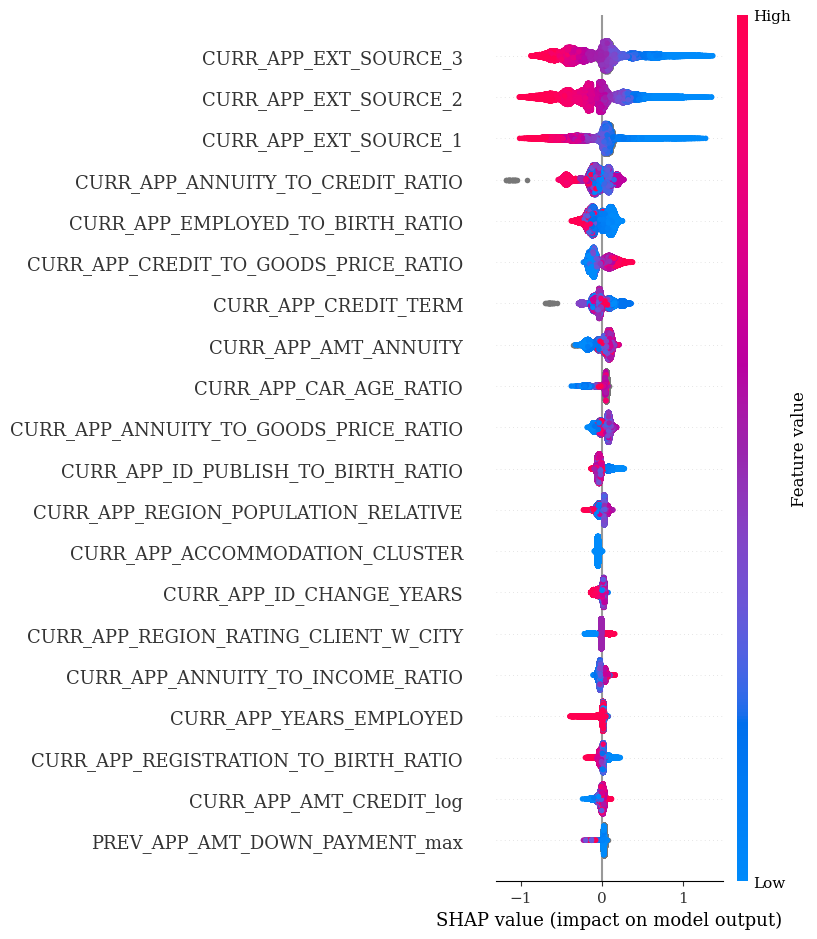

In [10]:
model = XGBClassifier()
model.load_model("XGB_model.json")
X = X_test.copy()
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

So far we only see evidence that the information in the `CURR_APP` is most important in loan prediction, as only one external feature has made it through. Let's now see if the other way to test it would show different results

## Comparing Individual Dataframes

In [21]:
X_CURR_APP_train = application_train[application_train.filter(like='CURR_APP_').columns.tolist() + ['TARGET']]
X_CURR_APP_test = application_test[application_test.filter(like='CURR_APP_').columns]

X_PREV_APP_train = application_train[application_train.filter(like='PREV_APP_').columns.tolist() + ['TARGET']]
X_PREV_APP_test = application_test[application_test.filter(like='PREV_APP_').columns]

X_CREDIT_CARD_train = application_train[application_train.filter(like='CREDIT_CARD_').columns.tolist() + ['TARGET']]
X_CREDIT_CARD_test = application_test[application_test.filter(like='CREDIT_CARD_').columns]

X_INSTALLMENTS_train = application_train[application_train.filter(like='INSTALLMENTS_').columns.tolist() + ['TARGET']]
X_INSTALLMENTS_test = application_test[application_test.filter(like='INSTALLMENTS_').columns]

X_BUREAU_train = application_train[application_train.filter(like='BUREAU_').columns.tolist() + ['TARGET']]
X_BUREAU_test = application_test[application_test.filter(like='BUREAU_').columns]

### Current Application

In [22]:
df_0 = X_CURR_APP_train[X_CURR_APP_train["TARGET"] == 0]
df_1 = X_CURR_APP_train[X_CURR_APP_train["TARGET"] == 1]

val_0 = df_0.sample(n = int(len(df_1) / 10), random_state=42)
val_1 = df_1.sample(frac=0.1, random_state=42)

validation_df = pd.concat([val_0, val_1]).sample(frac=1, random_state=42)
train_df = X_CURR_APP_train.drop(validation_df.index)

X_train = train_df.drop(columns=['TARGET'])
y_train = train_df['TARGET']

X_val = validation_df.drop(columns=['TARGET'])
y_val = validation_df['TARGET']

X_test = X_CURR_APP_test.copy()

In [18]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 0.9),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.9),
        "gamma": trial.suggest_float("gamma", 0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.5, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 10.0, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 3, 10),
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "n_jobs": -1,
        "random_state": 42,
        "verbosity": 0,
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_val)[:, 1]

    return roc_auc_score(y_val, y_proba)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best ROC AUC Score:", study.best_value)
print("Best Hyperparameters:", study.best_params)

best_params = study.best_params
best_params["random_state"] = 42
best_params["n_jobs"] = -1

model = XGBClassifier(**best_params)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_val)[:, 1]

best_thresh = 0.0
best_f1 = 0.0
for thresh in np.arange(0.01, 0.5, 0.01):
    preds = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

final_preds = (y_proba >= best_thresh).astype(int)
accuracy = accuracy_score(y_val, final_preds)
roc_auc = roc_auc_score(y_val, y_proba)

print("Best threshold:", best_thresh)
print("Best F1 Score:", best_f1)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Best Hyperparameters:", best_params)

[I 2025-08-01 23:26:49,155] A new study created in memory with name: no-name-77adc164-ad2a-479d-9581-4ebe22e2f87b
[I 2025-08-01 23:26:56,493] Trial 0 finished with value: 0.7486440648251618 and parameters: {'n_estimators': 300, 'learning_rate': 0.01423891991163346, 'max_depth': 7, 'subsample': 0.7413472166047537, 'colsample_bytree': 0.6877947824928271, 'gamma': 0.9375325510531479, 'reg_alpha': 2.6328048472053696, 'reg_lambda': 5.10143934906486, 'min_child_weight': 6}. Best is trial 0 with value: 0.7486440648251618.
[I 2025-08-01 23:27:10,861] Trial 1 finished with value: 0.7417165071187815 and parameters: {'n_estimators': 418, 'learning_rate': 0.005221533047575082, 'max_depth': 8, 'subsample': 0.8523946459057724, 'colsample_bytree': 0.8414446116528442, 'gamma': 0.3245366806958666, 'reg_alpha': 8.793708737861433, 'reg_lambda': 6.945007564408189, 'min_child_weight': 10}. Best is trial 0 with value: 0.7486440648251618.
[I 2025-08-01 23:27:21,099] Trial 2 finished with value: 0.72655082752

Best ROC AUC Score: 0.7575669721267908
Best Hyperparameters: {'n_estimators': 228, 'learning_rate': 0.06793480775215857, 'max_depth': 7, 'subsample': 0.8182128506962042, 'colsample_bytree': 0.8020730746614401, 'gamma': 4.579146254264254, 'reg_alpha': 0.628650720487863, 'reg_lambda': 2.3546003751337623, 'min_child_weight': 9}
Best threshold: 0.04
Best F1 Score: 0.7147097625329816
Accuracy: 0.6514907332796133
ROC AUC Score: 0.7575669721267908
Best Hyperparameters: {'n_estimators': 228, 'learning_rate': 0.06793480775215857, 'max_depth': 7, 'subsample': 0.8182128506962042, 'colsample_bytree': 0.8020730746614401, 'gamma': 4.579146254264254, 'reg_alpha': 0.628650720487863, 'reg_lambda': 2.3546003751337623, 'min_child_weight': 9, 'random_state': 42, 'n_jobs': -1}


In [23]:
X_train_full = pd.concat([X_train, X_val], axis=0)
y_train_full = pd.concat([y_train, y_val], axis=0)
model = XGBClassifier(**best_params)
model.fit(X_train_full, y_train_full)

final_preds = (model.predict_proba(X_test)[:, 1] >= best_thresh).astype(int)
submission = pd.DataFrame({
    'SK_ID_CURR': X_test.index,
    'TARGET': final_preds
})

submission.to_csv('Hypo_CURR.csv', index=False)

And the result is **66%**

The difference between our best model that we worked so much for isn't actually that significant compared to raw data from `application_train` and `application_test` alone

### Previous Application

In [24]:
df_0 = X_PREV_APP_train[X_PREV_APP_train["TARGET"] == 0]
df_1 = X_PREV_APP_train[X_PREV_APP_train["TARGET"] == 1]

val_0 = df_0.sample(n = int(len(df_1) / 10), random_state=42)
val_1 = df_1.sample(frac=0.1, random_state=42)

validation_df = pd.concat([val_0, val_1]).sample(frac=1, random_state=42)
train_df = X_PREV_APP_train.drop(validation_df.index)

X_train = train_df.drop(columns=['TARGET'])
y_train = train_df['TARGET']

X_val = validation_df.drop(columns=['TARGET'])
y_val = validation_df['TARGET']

X_test = X_PREV_APP_test.copy()

In [25]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 0.9),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.9),
        "gamma": trial.suggest_float("gamma", 0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.5, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 10.0, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 3, 10),
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "n_jobs": -1,
        "random_state": 42,
        "verbosity": 0,
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_val)[:, 1]

    return roc_auc_score(y_val, y_proba)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best ROC AUC Score:", study.best_value)
print("Best Hyperparameters:", study.best_params)

best_params = study.best_params
best_params["random_state"] = 42
best_params["n_jobs"] = -1

model = XGBClassifier(**best_params)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_val)[:, 1]

best_thresh = 0.0
best_f1 = 0.0
for thresh in np.arange(0.01, 0.5, 0.01):
    preds = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

final_preds = (y_proba >= best_thresh).astype(int)
accuracy = accuracy_score(y_val, final_preds)
roc_auc = roc_auc_score(y_val, y_proba)

print("Best threshold:", best_thresh)
print("Best F1 Score:", best_f1)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Best Hyperparameters:", best_params)

[I 2025-08-01 23:49:29,672] A new study created in memory with name: no-name-0d0f8cea-529f-4582-8863-221ff8402387
[I 2025-08-01 23:49:33,774] Trial 0 finished with value: 0.5842363161418134 and parameters: {'n_estimators': 377, 'learning_rate': 0.03214661551455069, 'max_depth': 8, 'subsample': 0.7079590604219502, 'colsample_bytree': 0.7872636185429472, 'gamma': 2.4722341039775775, 'reg_alpha': 0.6051297692644392, 'reg_lambda': 1.171192965559277, 'min_child_weight': 7}. Best is trial 0 with value: 0.5842363161418134.
[I 2025-08-01 23:49:35,139] Trial 1 finished with value: 0.5839876279234663 and parameters: {'n_estimators': 212, 'learning_rate': 0.0018005348424772858, 'max_depth': 3, 'subsample': 0.701337892028153, 'colsample_bytree': 0.8434798693441953, 'gamma': 2.2498831865035998, 'reg_alpha': 4.485928603557519, 'reg_lambda': 8.703321861375352, 'min_child_weight': 9}. Best is trial 0 with value: 0.5842363161418134.
[I 2025-08-01 23:49:43,608] Trial 2 finished with value: 0.58841271985

Best ROC AUC Score: 0.5944862640341645
Best Hyperparameters: {'n_estimators': 320, 'learning_rate': 0.008392452341541495, 'max_depth': 10, 'subsample': 0.6987824036886431, 'colsample_bytree': 0.7361224158859052, 'gamma': 2.547912998561992, 'reg_alpha': 6.330294937985832, 'reg_lambda': 6.58651543436402, 'min_child_weight': 5}
Best threshold: 0.04
Best F1 Score: 0.6684672518568535
Accuracy: 0.5054391619661563
ROC AUC Score: 0.5944862640341645
Best Hyperparameters: {'n_estimators': 320, 'learning_rate': 0.008392452341541495, 'max_depth': 10, 'subsample': 0.6987824036886431, 'colsample_bytree': 0.7361224158859052, 'gamma': 2.547912998561992, 'reg_alpha': 6.330294937985832, 'reg_lambda': 6.58651543436402, 'min_child_weight': 5, 'random_state': 42, 'n_jobs': -1}


In [26]:
X_train_full = pd.concat([X_train, X_val], axis=0)
y_train_full = pd.concat([y_train, y_val], axis=0)
model = XGBClassifier(**best_params)
model.fit(X_train_full, y_train_full)

final_preds = (model.predict_proba(X_test)[:, 1] >= best_thresh).astype(int)
submission = pd.DataFrame({
    'SK_ID_CURR': X_test.index,
    'TARGET': final_preds
})

submission.to_csv('Hypo_PREV.csv', index=False)

And the final accuracy is **49.9%**

Guess we are at 50.1% accuracy if we invert it. Still, very impressive

### Credit Card

In [27]:
df_0 = X_CREDIT_CARD_train[X_CREDIT_CARD_train["TARGET"] == 0]
df_1 = X_CREDIT_CARD_train[X_CREDIT_CARD_train["TARGET"] == 1]

val_0 = df_0.sample(n = int(len(df_1) / 10), random_state=42)
val_1 = df_1.sample(frac=0.1, random_state=42)

validation_df = pd.concat([val_0, val_1]).sample(frac=1, random_state=42)
train_df = X_CREDIT_CARD_train.drop(validation_df.index)

X_train = train_df.drop(columns=['TARGET'])
y_train = train_df['TARGET']

X_val = validation_df.drop(columns=['TARGET'])
y_val = validation_df['TARGET']

X_test = X_CREDIT_CARD_test.copy()

In [28]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 0.9),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.9),
        "gamma": trial.suggest_float("gamma", 0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.5, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 10.0, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 3, 10),
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "n_jobs": -1,
        "random_state": 42,
        "verbosity": 0,
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_val)[:, 1]

    return roc_auc_score(y_val, y_proba)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best ROC AUC Score:", study.best_value)
print("Best Hyperparameters:", study.best_params)

best_params = study.best_params
best_params["random_state"] = 42
best_params["n_jobs"] = -1

model = XGBClassifier(**best_params)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_val)[:, 1]

best_thresh = 0.0
best_f1 = 0.0
for thresh in np.arange(0.01, 0.5, 0.01):
    preds = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

final_preds = (y_proba >= best_thresh).astype(int)
accuracy = accuracy_score(y_val, final_preds)
roc_auc = roc_auc_score(y_val, y_proba)

print("Best threshold:", best_thresh)
print("Best F1 Score:", best_f1)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Best Hyperparameters:", best_params)

[I 2025-08-02 00:02:00,878] A new study created in memory with name: no-name-e28be1d2-e385-4c3b-8298-4475249fecf8
[I 2025-08-02 00:02:02,480] Trial 0 finished with value: 0.5399069919049712 and parameters: {'n_estimators': 150, 'learning_rate': 0.04797472372574658, 'max_depth': 9, 'subsample': 0.8795652924771589, 'colsample_bytree': 0.6943377233117655, 'gamma': 4.9598819394378415, 'reg_alpha': 1.4205094959100886, 'reg_lambda': 0.6511280583733703, 'min_child_weight': 9}. Best is trial 0 with value: 0.5399069919049712.
[I 2025-08-02 00:02:04,066] Trial 1 finished with value: 0.5408092983421002 and parameters: {'n_estimators': 133, 'learning_rate': 0.00201356144699496, 'max_depth': 4, 'subsample': 0.63250885736133, 'colsample_bytree': 0.6817348253591227, 'gamma': 0.11466306167087659, 'reg_alpha': 2.057699413985887, 'reg_lambda': 6.952228005268804, 'min_child_weight': 7}. Best is trial 1 with value: 0.5408092983421002.
[I 2025-08-02 00:02:07,622] Trial 2 finished with value: 0.541537100970

Best ROC AUC Score: 0.5429971702787061
Best Hyperparameters: {'n_estimators': 453, 'learning_rate': 0.0046081097972078666, 'max_depth': 5, 'subsample': 0.8274164482045647, 'colsample_bytree': 0.7109271660049352, 'gamma': 0.8904623257615849, 'reg_alpha': 1.1152519372943777, 'reg_lambda': 1.2197662443964061, 'min_child_weight': 3}
Best threshold: 0.05
Best F1 Score: 0.6673047996718173
Accuracy: 0.5098710717163578
ROC AUC Score: 0.5429971702787061
Best Hyperparameters: {'n_estimators': 453, 'learning_rate': 0.0046081097972078666, 'max_depth': 5, 'subsample': 0.8274164482045647, 'colsample_bytree': 0.7109271660049352, 'gamma': 0.8904623257615849, 'reg_alpha': 1.1152519372943777, 'reg_lambda': 1.2197662443964061, 'min_child_weight': 3, 'random_state': 42, 'n_jobs': -1}


In [29]:
X_train_full = pd.concat([X_train, X_val], axis=0)
y_train_full = pd.concat([y_train, y_val], axis=0)
model = XGBClassifier(**best_params)
model.fit(X_train_full, y_train_full)

final_preds = (model.predict_proba(X_test)[:, 1] >= best_thresh).astype(int)
submission = pd.DataFrame({
    'SK_ID_CURR': X_test.index,
    'TARGET': final_preds
})

submission.to_csv('Hypo_CRED.csv', index=False)

And the result is **50%** sharp, meaning a coin toss

### Installments

In [30]:
df_0 = X_INSTALLMENTS_train[X_INSTALLMENTS_train["TARGET"] == 0]
df_1 = X_INSTALLMENTS_train[X_INSTALLMENTS_train["TARGET"] == 1]

val_0 = df_0.sample(n = int(len(df_1) / 10), random_state=42)
val_1 = df_1.sample(frac=0.1, random_state=42)

validation_df = pd.concat([val_0, val_1]).sample(frac=1, random_state=42)
train_df = X_INSTALLMENTS_train.drop(validation_df.index)

X_train = train_df.drop(columns=['TARGET'])
y_train = train_df['TARGET']

X_val = validation_df.drop(columns=['TARGET'])
y_val = validation_df['TARGET']

X_test = X_INSTALLMENTS_test.copy()

In [31]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 0.9),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.9),
        "gamma": trial.suggest_float("gamma", 0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.5, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 10.0, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 3, 10),
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "n_jobs": -1,
        "random_state": 42,
        "verbosity": 0,
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_val)[:, 1]

    return roc_auc_score(y_val, y_proba)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best ROC AUC Score:", study.best_value)
print("Best Hyperparameters:", study.best_params)

best_params = study.best_params
best_params["random_state"] = 42
best_params["n_jobs"] = -1

model = XGBClassifier(**best_params)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_val)[:, 1]

best_thresh = 0.0
best_f1 = 0.0
for thresh in np.arange(0.01, 0.5, 0.01):
    preds = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

final_preds = (y_proba >= best_thresh).astype(int)
accuracy = accuracy_score(y_val, final_preds)
roc_auc = roc_auc_score(y_val, y_proba)

print("Best threshold:", best_thresh)
print("Best F1 Score:", best_f1)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Best Hyperparameters:", best_params)

[I 2025-08-02 00:06:38,035] A new study created in memory with name: no-name-7e9a1a4d-3b97-49f4-89e7-7eb6864a9907
[I 2025-08-02 00:06:38,819] Trial 0 finished with value: 0.562872748251553 and parameters: {'n_estimators': 153, 'learning_rate': 0.0014320668582114117, 'max_depth': 4, 'subsample': 0.8871998481208077, 'colsample_bytree': 0.7947753406125481, 'gamma': 1.9855725956979624, 'reg_alpha': 1.160742339955267, 'reg_lambda': 1.340546068808848, 'min_child_weight': 4}. Best is trial 0 with value: 0.562872748251553.
[I 2025-08-02 00:06:40,911] Trial 1 finished with value: 0.5672011731850468 and parameters: {'n_estimators': 275, 'learning_rate': 0.0016446377174282956, 'max_depth': 8, 'subsample': 0.6108028692116304, 'colsample_bytree': 0.8490506478961483, 'gamma': 1.4401094349705412, 'reg_alpha': 6.599232595470736, 'reg_lambda': 2.6236859452160872, 'min_child_weight': 5}. Best is trial 1 with value: 0.5672011731850468.
[I 2025-08-02 00:06:42,130] Trial 2 finished with value: 0.5645464426

Best ROC AUC Score: 0.5708703795449721
Best Hyperparameters: {'n_estimators': 212, 'learning_rate': 0.019258878706947213, 'max_depth': 7, 'subsample': 0.7280545420506879, 'colsample_bytree': 0.7966844795210333, 'gamma': 3.7927096294607123, 'reg_alpha': 0.8007742509851342, 'reg_lambda': 0.5961980971201666, 'min_child_weight': 9}
Best threshold: 0.05
Best F1 Score: 0.6677740863787376
Accuracy: 0.5165189363416599
ROC AUC Score: 0.5708703795449721
Best Hyperparameters: {'n_estimators': 212, 'learning_rate': 0.019258878706947213, 'max_depth': 7, 'subsample': 0.7280545420506879, 'colsample_bytree': 0.7966844795210333, 'gamma': 3.7927096294607123, 'reg_alpha': 0.8007742509851342, 'reg_lambda': 0.5961980971201666, 'min_child_weight': 9, 'random_state': 42, 'n_jobs': -1}


In [32]:
X_train_full = pd.concat([X_train, X_val], axis=0)
y_train_full = pd.concat([y_train, y_val], axis=0)
model = XGBClassifier(**best_params)
model.fit(X_train_full, y_train_full)

final_preds = (model.predict_proba(X_test)[:, 1] >= best_thresh).astype(int)
submission = pd.DataFrame({
    'SK_ID_CURR': X_test.index,
    'TARGET': final_preds
})

submission.to_csv('Hypo_INST.csv', index=False)

And the result is **50.2%**, which is a huge achievement compared to other dataframes

### Bureau

In [33]:
df_0 = X_BUREAU_train[X_BUREAU_train["TARGET"] == 0]
df_1 = X_BUREAU_train[X_BUREAU_train["TARGET"] == 1]

val_0 = df_0.sample(n = int(len(df_1) / 10), random_state=42)
val_1 = df_1.sample(frac=0.1, random_state=42)

validation_df = pd.concat([val_0, val_1]).sample(frac=1, random_state=42)
train_df = X_BUREAU_train.drop(validation_df.index)

X_train = train_df.drop(columns=['TARGET'])
y_train = train_df['TARGET']

X_val = validation_df.drop(columns=['TARGET'])
y_val = validation_df['TARGET']

X_test = X_BUREAU_test.copy()

In [34]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 0.9),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.9),
        "gamma": trial.suggest_float("gamma", 0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.5, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 10.0, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 3, 10),
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "n_jobs": -1,
        "random_state": 42,
        "verbosity": 0,
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_val)[:, 1]

    return roc_auc_score(y_val, y_proba)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best ROC AUC Score:", study.best_value)
print("Best Hyperparameters:", study.best_params)

best_params = study.best_params
best_params["random_state"] = 42
best_params["n_jobs"] = -1

model = XGBClassifier(**best_params)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_val)[:, 1]

best_thresh = 0.0
best_f1 = 0.0
for thresh in np.arange(0.01, 0.5, 0.01):
    preds = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

final_preds = (y_proba >= best_thresh).astype(int)
accuracy = accuracy_score(y_val, final_preds)
roc_auc = roc_auc_score(y_val, y_proba)

print("Best threshold:", best_thresh)
print("Best F1 Score:", best_f1)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Best Hyperparameters:", best_params)

[I 2025-08-02 00:07:41,597] A new study created in memory with name: no-name-0fcfc12b-cc9a-4070-84b7-d9fe94433ace
[I 2025-08-02 00:07:44,490] Trial 0 finished with value: 0.5820667062316851 and parameters: {'n_estimators': 443, 'learning_rate': 0.0677403321282261, 'max_depth': 5, 'subsample': 0.7611488331542556, 'colsample_bytree': 0.7753559356383625, 'gamma': 2.3961685733477696, 'reg_alpha': 1.4664757056587088, 'reg_lambda': 1.5445653102096395, 'min_child_weight': 7}. Best is trial 0 with value: 0.5820667062316851.
[I 2025-08-02 00:07:48,856] Trial 1 finished with value: 0.5863233005276995 and parameters: {'n_estimators': 292, 'learning_rate': 0.005588733440590189, 'max_depth': 10, 'subsample': 0.6806582239408112, 'colsample_bytree': 0.7538867306453534, 'gamma': 1.4368991110273122, 'reg_alpha': 6.246330077743457, 'reg_lambda': 2.895669212635588, 'min_child_weight': 10}. Best is trial 1 with value: 0.5863233005276995.
[I 2025-08-02 00:07:51,334] Trial 2 finished with value: 0.577638367

Best ROC AUC Score: 0.5911874927357716
Best Hyperparameters: {'n_estimators': 393, 'learning_rate': 0.023705982030015137, 'max_depth': 10, 'subsample': 0.6843799918855641, 'colsample_bytree': 0.6018999539997736, 'gamma': 3.7474830728260478, 'reg_alpha': 0.5095802953449556, 'reg_lambda': 2.1422656058445533, 'min_child_weight': 6}
Best threshold: 0.04
Best F1 Score: 0.6715120421832692
Accuracy: 0.5356567284448026
ROC AUC Score: 0.5911874927357716
Best Hyperparameters: {'n_estimators': 393, 'learning_rate': 0.023705982030015137, 'max_depth': 10, 'subsample': 0.6843799918855641, 'colsample_bytree': 0.6018999539997736, 'gamma': 3.7474830728260478, 'reg_alpha': 0.5095802953449556, 'reg_lambda': 2.1422656058445533, 'min_child_weight': 6, 'random_state': 42, 'n_jobs': -1}


In [35]:
X_train_full = pd.concat([X_train, X_val], axis=0)
y_train_full = pd.concat([y_train, y_val], axis=0)
model = XGBClassifier(**best_params)
model.fit(X_train_full, y_train_full)

final_preds = (model.predict_proba(X_test)[:, 1] >= best_thresh).astype(int)
submission = pd.DataFrame({
    'SK_ID_CURR': X_test.index,
    'TARGET': final_preds
})

submission.to_csv('Hypo_BUREAU.csv', index=False)

And the accuracy is **50.5%**, the highest borrowing `CURR_APP`

### Conclusion

SHAP values and the accuracies of the models based only on individual dataframes all confirm that the information submitted during the application process is the most important for making a decision. Let's now do some statistical testing whether `INSTALLMENTS` is really the decisive factor here. Not because there is any reason to do it but because I promised to

In [39]:
accuracies = [0.66044, 0.50051, 0.50071, 0.50143, 0.50457]
length = len(application_test)
accuracies = [acc * length for acc in accuracies]
lengths = [length for _ in accuracies]

In [48]:
stat, pval = proportions_ztest([accuracies[i] for i in [3, 0]], [lengths[i] for i in [3, 0]])
print(f"Z-statistic: {stat:.3f}, p-value: {pval:.4f}")

Z-statistic: -50.311, p-value: 0.0000


In [43]:
stat, pval = proportions_ztest([accuracies[i] for i in [3, 1]], [lengths[i] for i in [3, 1]])
print(f"Z-statistic: {stat:.3f}, p-value: {pval:.4f}")

Z-statistic: 0.287, p-value: 0.7739


In [44]:
stat, pval = proportions_ztest([accuracies[i] for i in [3, 2]], [lengths[i] for i in [3, 2]])
print(f"Z-statistic: {stat:.3f}, p-value: {pval:.4f}")

Z-statistic: 0.225, p-value: 0.8221


In [45]:
stat, pval = proportions_ztest([accuracies[i] for i in [3, 3]], [lengths[i] for i in [3, 3]])
print(f"Z-statistic: {stat:.3f}, p-value: {pval:.4f}")

Z-statistic: 0.000, p-value: 1.0000


In [46]:
stat, pval = proportions_ztest([accuracies[i] for i in [3, 4]], [lengths[i] for i in [3, 4]])
print(f"Z-statistic: {stat:.3f}, p-value: {pval:.4f}")

Z-statistic: -0.980, p-value: 0.3269


And here it is, statistical proof that installments are not better at predicting repayment issues

# Conclusion

In this project we set an objective to predict repayment issues based on the Home Credit dataset while keeping the work as close to real production environment as possible, which is taking serious step to prevent any data leakage. We have defined our approach, which has been updated as we uncover new facts about the data, engineered a huge amount of features and then sieved out the features with least predictive power to later on combine everything in one big dataset, after which we did some preprocessing and have trained our models on `application_train` to later check them using `application_test`.

The best-performing model ended up being XGBoost, which is certainly understandable considering the data we have at hand, and the resulting accuracy is **68.4%**.<br><br><br>

**Why so low? Other submissions are closer to 80% on Kaggle**<br><br>

And it doesn't matter.<div>

The first reason for this is that training and testing data is fundamentally different from each other, as the target distribution is different, allowing us to conclude that the feature distibution is also different, as, obviously, features predict the target. Second, I have not allowed for any data leakage to make use of it. Interestingly enough, the accuracy of my second iteration of the project, so before I scrapped everything and started from the beginning, was **64%**, and underlying transformations that led to a creation of this model were ridiculous. Why? Because I made every single mistake imaginable when it comes to external dataset handling and allowed for massive data leakage, that is how much it matters in this project.

One additional remark here would be that even though it is a Kaggle project, accuracy here does not matter, at all. In loans what we care about is identifying people who are NOT going to pay back. Even though Kaggle itself does not provide any numbers on recall, because our validation model and testing model are actually pretty close, we can claim that the **model can identify about 80-85% of people with repayment issues**.

A singular thing I may suggest as an improvement is better feature engineering. I feel like I missed some important relationships because I did the selection process first before aggregating everything together. Even though it is more of a hardware issue